In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data[1750:2261], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(4)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有四级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt.values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [6]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [7]:
print(X.shape)
print(y.shape)

(3000, 32, 16)
(3000, 1)


In [8]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [10]:
X_train = X_train.reshape(-1, 32, 16, 1)
X_test = X_test.reshape(-1, 32, 16, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(7, 5), input_shape=(32, 16, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [13]:
model.add(Conv2D(filters=32, kernel_size=(5, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [14]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [15]:
adam = Adam(lr=1e-4)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 12, 16)        576       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 6, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 6, 32)         7712      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 6, 32)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 672)               0         
__________

In [17]:
model.compile(optimizer=adam, loss='squared_hinge', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_split=0.1)

Train on 2295 samples, validate on 255 samples
Epoch 1/300
2295/2295 [==============================] - 2s 966us/step - loss: 0.8143 - acc: 0.3577 - val_loss: 0.8137 - val_acc: 0.3255
Epoch 2/300
2295/2295 [==============================] - 1s 610us/step - loss: 0.8125 - acc: 0.4610 - val_loss: 0.8118 - val_acc: 0.5922
Epoch 3/300
2295/2295 [==============================] - 1s 563us/step - loss: 0.8107 - acc: 0.4684 - val_loss: 0.8090 - val_acc: 0.3529
Epoch 4/300
2295/2295 [==============================] - 1s 590us/step - loss: 0.8083 - acc: 0.5612 - val_loss: 0.8061 - val_acc: 0.6745
Epoch 5/300
2295/2295 [==============================] - 1s 642us/step - loss: 0.8042 - acc: 0.6645 - val_loss: 0.8024 - val_acc: 0.3529
Epoch 6/300
2295/2295 [==============================] - 1s 600us/step - loss: 0.7987 - acc: 0.6405 - val_loss: 0.7957 - val_acc: 0.6471
Epoch 7/300
2295/2295 [==============================] - 1s 597us/step - loss: 0.7913 - acc: 0.6749 - val_loss: 0.7872 - val_acc: 0

Epoch 60/300
2295/2295 [==============================] - 1s 573us/step - loss: 0.6939 - acc: 0.9054 - val_loss: 0.6943 - val_acc: 0.8784
Epoch 61/300
2295/2295 [==============================] - 1s 607us/step - loss: 0.6935 - acc: 0.9033 - val_loss: 0.6940 - val_acc: 0.9020
Epoch 62/300
2295/2295 [==============================] - 1s 575us/step - loss: 0.6928 - acc: 0.9072 - val_loss: 0.6940 - val_acc: 0.9059
Epoch 63/300
2295/2295 [==============================] - 1s 601us/step - loss: 0.6927 - acc: 0.8963 - val_loss: 0.6928 - val_acc: 0.8824
Epoch 64/300
2295/2295 [==============================] - 1s 590us/step - loss: 0.6919 - acc: 0.9089 - val_loss: 0.6928 - val_acc: 0.9059
Epoch 65/300
2295/2295 [==============================] - 1s 583us/step - loss: 0.6915 - acc: 0.9076 - val_loss: 0.6925 - val_acc: 0.9059
Epoch 66/300
2295/2295 [==============================] - 1s 612us/step - loss: 0.6910 - acc: 0.9120 - val_loss: 0.6922 - val_acc: 0.9059
Epoch 67/300
2295/2295 [==========

2295/2295 [==============================] - 1s 563us/step - loss: 0.6801 - acc: 0.9464 - val_loss: 0.6829 - val_acc: 0.9333
Epoch 120/300
2295/2295 [==============================] - 1s 599us/step - loss: 0.6796 - acc: 0.9499 - val_loss: 0.6811 - val_acc: 0.9333
Epoch 121/300
2295/2295 [==============================] - 1s 571us/step - loss: 0.6796 - acc: 0.9516 - val_loss: 0.6811 - val_acc: 0.9333
Epoch 122/300
2295/2295 [==============================] - 1s 576us/step - loss: 0.6794 - acc: 0.9512 - val_loss: 0.6805 - val_acc: 0.9412
Epoch 123/300
2295/2295 [==============================] - 1s 571us/step - loss: 0.6790 - acc: 0.9512 - val_loss: 0.6806 - val_acc: 0.9333
Epoch 124/300
2295/2295 [==============================] - 1s 563us/step - loss: 0.6791 - acc: 0.9525 - val_loss: 0.6813 - val_acc: 0.9333
Epoch 125/300
2295/2295 [==============================] - 1s 569us/step - loss: 0.6788 - acc: 0.9569 - val_loss: 0.6802 - val_acc: 0.9412
Epoch 126/300
2295/2295 [================

Epoch 178/300
2295/2295 [==============================] - 1s 571us/step - loss: 0.6710 - acc: 0.9939 - val_loss: 0.6722 - val_acc: 0.9922
Epoch 179/300
2295/2295 [==============================] - 1s 564us/step - loss: 0.6711 - acc: 0.9926 - val_loss: 0.6736 - val_acc: 0.9686
Epoch 180/300
2295/2295 [==============================] - 1s 577us/step - loss: 0.6712 - acc: 0.9935 - val_loss: 0.6734 - val_acc: 0.9686
Epoch 181/300
2295/2295 [==============================] - 1s 576us/step - loss: 0.6709 - acc: 0.9917 - val_loss: 0.6725 - val_acc: 0.9843
Epoch 182/300
2295/2295 [==============================] - 1s 565us/step - loss: 0.6708 - acc: 0.9935 - val_loss: 0.6719 - val_acc: 0.9882
Epoch 183/300
2295/2295 [==============================] - 1s 608us/step - loss: 0.6709 - acc: 0.9917 - val_loss: 0.6717 - val_acc: 0.9882
Epoch 184/300
2295/2295 [==============================] - 1s 582us/step - loss: 0.6710 - acc: 0.9922 - val_loss: 0.6750 - val_acc: 0.9647
Epoch 185/300
2295/2295 [==

2295/2295 [==============================] - 1s 597us/step - loss: 0.6683 - acc: 0.9974 - val_loss: 0.6689 - val_acc: 0.9922
Epoch 237/300
2295/2295 [==============================] - 1s 575us/step - loss: 0.6682 - acc: 0.9983 - val_loss: 0.6692 - val_acc: 0.9922
Epoch 238/300
2295/2295 [==============================] - 1s 634us/step - loss: 0.6682 - acc: 0.9983 - val_loss: 0.6691 - val_acc: 0.9922
Epoch 239/300
2295/2295 [==============================] - 1s 619us/step - loss: 0.6682 - acc: 0.9978 - val_loss: 0.6688 - val_acc: 0.9961
Epoch 240/300
2295/2295 [==============================] - 1s 571us/step - loss: 0.6681 - acc: 0.9983 - val_loss: 0.6688 - val_acc: 0.9961
Epoch 241/300
2295/2295 [==============================] - 1s 625us/step - loss: 0.6682 - acc: 0.9965 - val_loss: 0.6688 - val_acc: 0.9961
Epoch 242/300
2295/2295 [==============================] - 1s 597us/step - loss: 0.6681 - acc: 0.9983 - val_loss: 0.6688 - val_acc: 0.9922
Epoch 243/300
2295/2295 [================

2295/2295 [==============================] - 1s 631us/step - loss: 0.6674 - acc: 0.9991 - val_loss: 0.6687 - val_acc: 0.9922
Epoch 295/300
2295/2295 [==============================] - 1s 579us/step - loss: 0.6674 - acc: 0.9987 - val_loss: 0.6680 - val_acc: 0.9961
Epoch 296/300
2295/2295 [==============================] - 1s 569us/step - loss: 0.6676 - acc: 0.9978 - val_loss: 0.6687 - val_acc: 0.9882
Epoch 297/300
2295/2295 [==============================] - 1s 580us/step - loss: 0.6674 - acc: 0.9991 - val_loss: 0.6680 - val_acc: 0.9961
Epoch 298/300
2295/2295 [==============================] - 1s 592us/step - loss: 0.6674 - acc: 0.9991 - val_loss: 0.6684 - val_acc: 0.9922
Epoch 299/300
2295/2295 [==============================] - 1s 574us/step - loss: 0.6673 - acc: 0.9991 - val_loss: 0.6681 - val_acc: 0.9961
Epoch 300/300
2295/2295 [==============================] - 1s 557us/step - loss: 0.6674 - acc: 0.9991 - val_loss: 0.6679 - val_acc: 1.0000


In [19]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - ETA:  - 0s 353us/step
LOSS: 0.6678663598166572
Accuracy: 0.9977777777777778


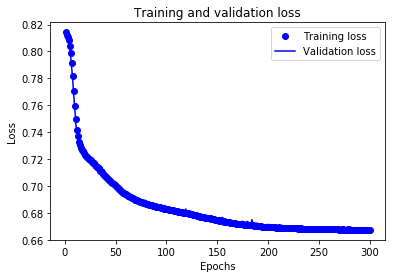

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

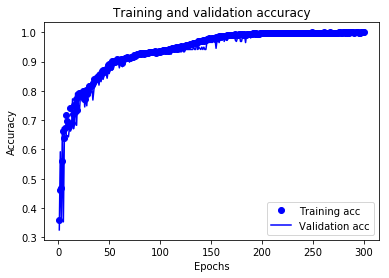

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()